# problem

#  use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
import numpy as np
import pandas as pd
import tensorflow
import seaborn as sns


# load and check data

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Data exploratory

In [3]:
#printing first five rows of  train_dataset
train_data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# checking shape of train_data
train_data.shape # 891 rows and 12 columns

(891, 12)

In [6]:
#checking shape of test data
test_data.shape

(418, 11)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# sumarie and statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# check missing values in train and test data

In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Feature analysis

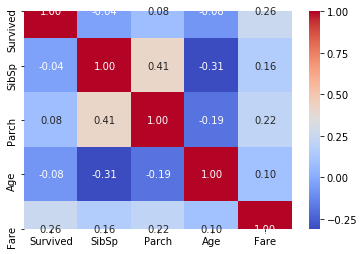

In [13]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train_data[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True
                , fmt = ".2f", cmap = "coolwarm")

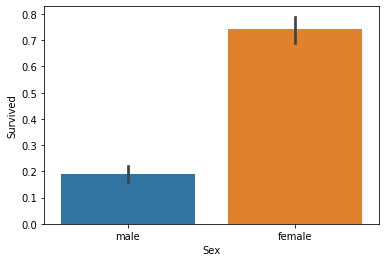

In [14]:
# survival probability
g1 = sns.barplot(x="Sex",y="Survived",data=train_data)
g1 = g.set_ylabel("Survival Probability")

# handle missing values

# numerical_values

In [15]:
# handle missing value in train_data
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())

In [16]:
train_data["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [17]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# handle missing value in test_data
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].mean())

In [19]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Categorical values

In [20]:
# train_data
train_data['Cabin']=train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])



In [21]:
train_data.isnull().sum() # all missing values handle

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
# test_data
test_data['Cabin']=test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mode()[0])


In [23]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# joining test and train data_set

In [24]:
dataset =  pd.concat([train_data, test_data], axis=0)

C:\Users\Aqsa Abdul Qadir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [25]:
dataset.shape

(1309, 12)

In [26]:
# Fill empty and NaNs values with NaN
dataset = dataset.fillna(np.nan)

In [27]:
# drop name column
dataset.drop(['Name'],axis=1,inplace=True)

In [28]:
dataset.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

# One_Hot_Coding

# How to handle categorical data?

In [29]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [30]:
encode = dataset[['Sex','Ticket','Cabin','Embarked']].apply(enc.fit_transform)
encode

,Sex,Ticket,Cabin,Embarked
0,1,720,60,2
1,0,816,106,0
2,0,914,60,2
3,0,65,70,2
4,1,649,60,2
...,...,...,...,...
413,1,711,47,2
414,0,834,64,0
415,1,872,47,2
416,1,579,47,2


In [31]:
dataset[['Sex','Ticket','Cabin','Embarked']] = encode[['Sex','Ticket','Cabin','Embarked']]

In [32]:
dataset.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,60,2,7.2500,0,1,3,1,1,0.0,720
1,38.0,106,0,71.2833,0,2,1,0,1,1.0,816
2,26.0,60,2,7.9250,0,3,3,0,0,1.0,914
3,35.0,70,2,53.1000,0,4,1,0,1,1.0,65
4,35.0,60,2,8.0500,0,5,3,1,0,0.0,649


In [33]:
dataset.shape

(1309, 11)

In [34]:
train_len = len(train_data)

# Modeling

In [35]:
train = dataset[:train_len]
test= dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

C:\Users\Aqsa Abdul Qadir\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
test.shape

(418, 10)

In [37]:
train.shape

(891, 11)

In [38]:
train["Survived"] = train["Survived"].astype(int)

C:\Users\Aqsa Abdul Qadir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
Y_train = train["Survived"]

X_train = train.drop(labels = ["Survived"],axis = 1)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier


# Training 

In [48]:
model = GradientBoostingClassifier(learning_rate=0.01,max_depth = 2)
model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
Score = model.score(X_train, Y_train)
print("Score: %.2f%%" % (Score * 100.0))

Score: 78.68%


# Predication

In [50]:
predictions = model.predict(test)

In [51]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

# Output

In [52]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#  Saving submission csv file

In [53]:
output.to_csv('my_submission3.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


If you found this notebook helpful or you just liked it , some upvotes would be very much appreciated - That will keep me motivated :)